In [30]:
import matplotlib.pyplot as plt
import numpy as np

from filter_images import difference_filter, derivative_gaussian_filter, oriented_filter, get_direction, plot_pie,plot_filter

%matplotlib inline

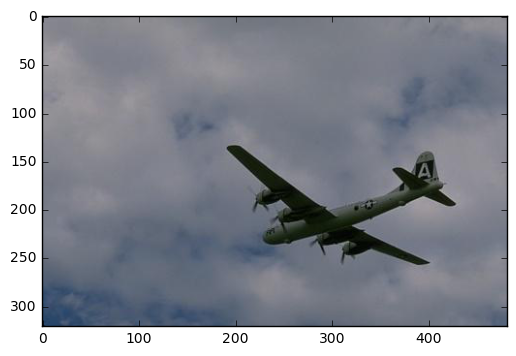

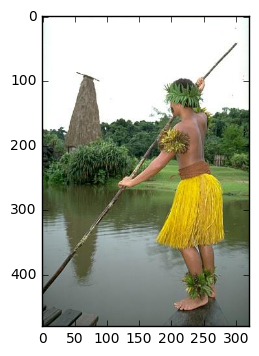

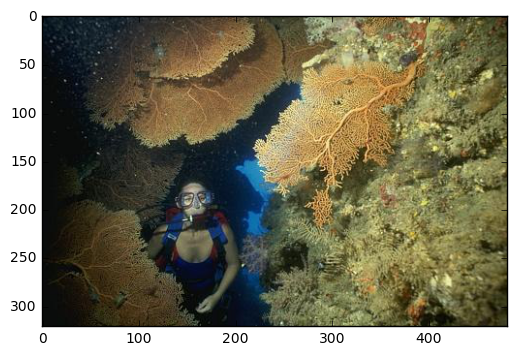

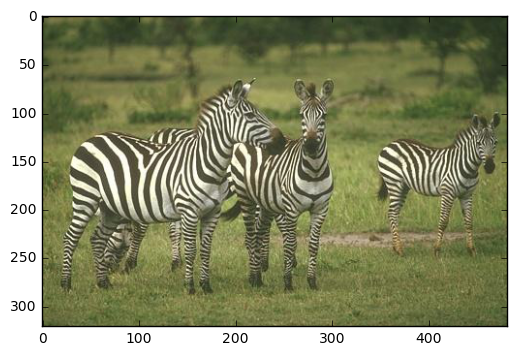

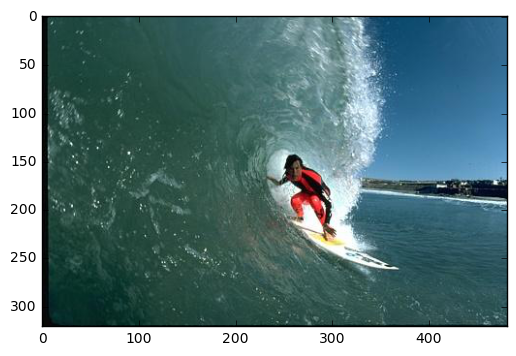

In [31]:
img1 = np.array(plt.imread('bsds_3096.jpg'),dtype='float')/255
img2 = np.array(plt.imread('bsds_101087.jpg'),dtype='float')/255
img3 = np.array(plt.imread('bsds_156065.jpg'),dtype='float')/255
img4 = np.array(plt.imread('bsds_253027.jpg'),dtype='float')/255
img5 = np.array(plt.imread('bsds_300091.jpg'),dtype='float')/255


plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(img3)
plt.show()
plt.imshow(img4)
plt.show()
plt.imshow(img5)
plt.show()

# 1. Finite operator

Apply difference filter. 

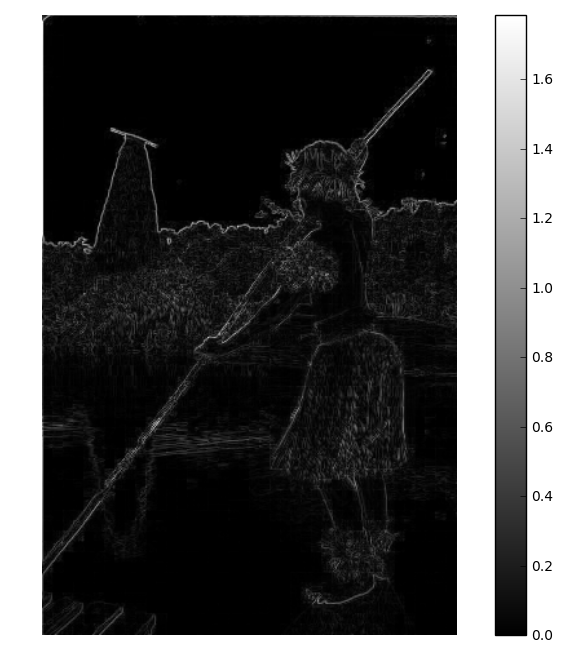

In [32]:
# threshold = 0.05
mag, theta = difference_filter(img2, threshold=0.05)

# calculate orientation on each pixel
theta = get_direction(theta)

# show the magnitude in gray scale
plt.figure(figsize=(10,8))
plt.imshow(mag,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

Display orientation. Different colors indicate different orientation and the mapping is shown in the pie chart

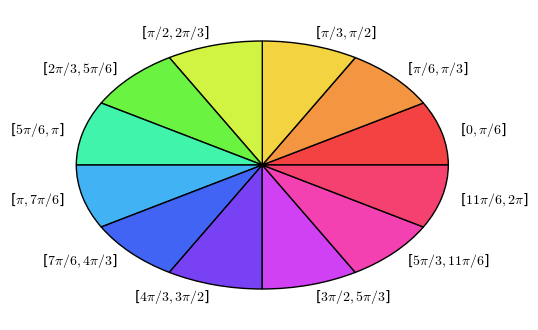

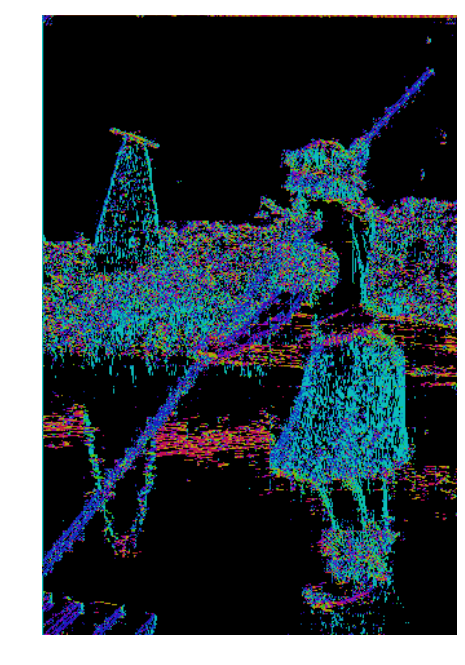

In [33]:
plot_pie()
plt.figure(figsize=(10,8))
plt.imshow(theta)
plt.axis('off')
plt.show()

In [34]:
# plt.figure(figsize=(10,8))
# plt.imshow(mag[:,:,0], cmap=plt.get_cmap('gray'))
# plt.axis('off')
# plt.show()

In [35]:
# d1, d2, _ = mag.shape
# sampling = 3
# y = np.array(range(d1))[::sampling]
# x = np.array(range(d2))[::sampling]
# X,Y = np.meshgrid(x, y)
# na_theta = np.isnan(theta[y,:,0][:,x])
# orient_x = mag[y,:,0][:,x] * np.cos(theta[y,:,0][:,x])
# orient_y = mag[y,:,0][:,x] * np.sin(theta[y,:,0][:,x])
# orient_x[na_theta] = 0
# orient_y[na_theta] = 0

In [36]:
# plt.figure(figsize=(10, 8))
# plt.quiver(X, d1 - Y, orient_x, orient_y, color='b', angles='xy', scale_units='x', scale=1)
# plt.axis('off')
# plt.show()

# 2. Derivative of Gaussian

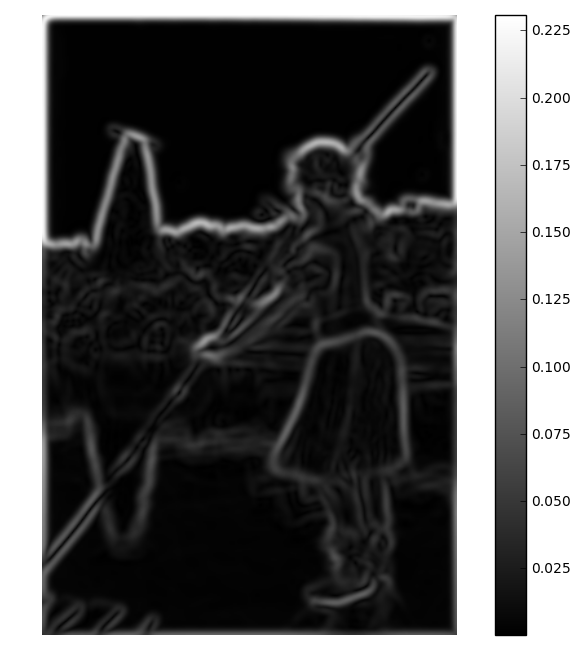

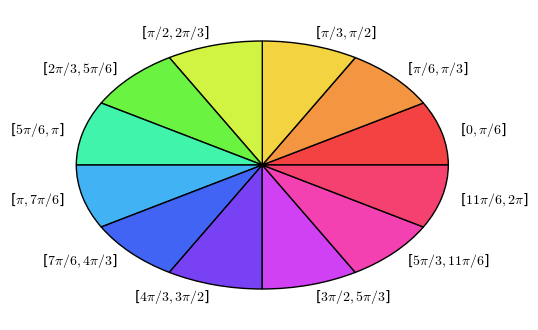

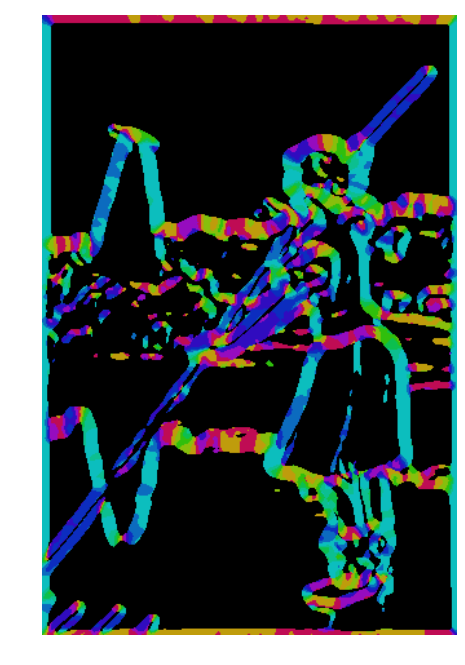

In [37]:
# threshold = 0.015, sigma = 3, size = 20
mag, theta = derivative_gaussian_filter(img2, 3, threshold=0.015, size = 20)

# calculate orientation on each pixel
theta = get_direction(theta)

# show the magnitude in gray scale
plt.figure(figsize=(10,8))
plt.imshow(mag,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

plot_pie()
plt.figure(figsize=(10,8))
plt.imshow(theta)
plt.axis('off')
plt.show()

# 2. Oriented filters

We will try derivative of gaussian with different orientations

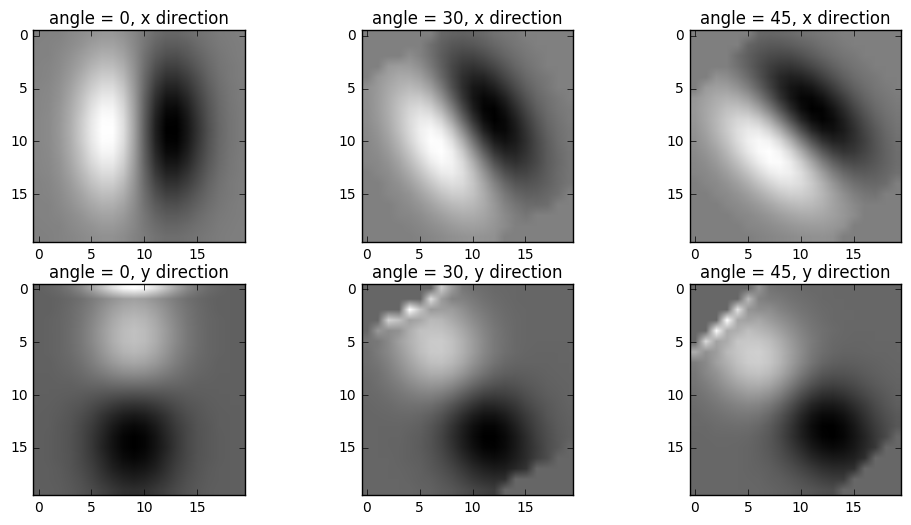

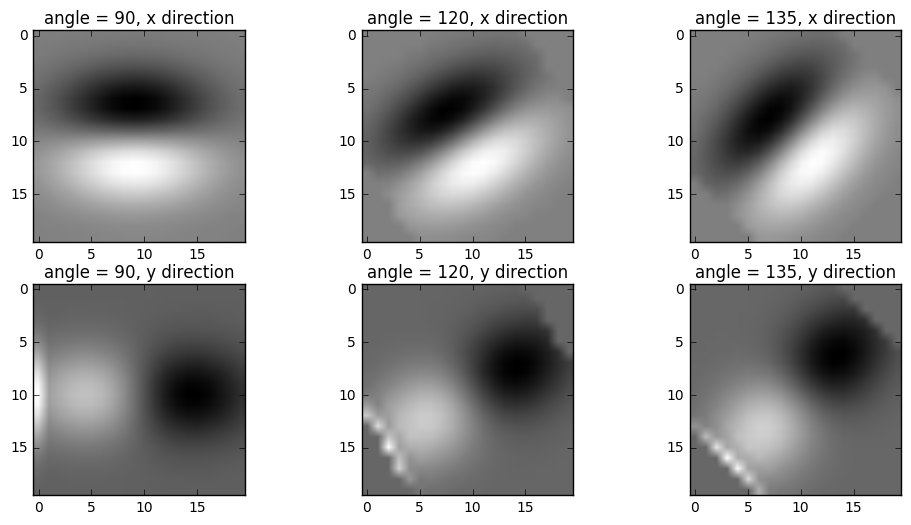

In [38]:
# different angles
angle = [0, 30, 45, 90, 120, 135]
plt.figure(figsize=(12,6))
for i in range(3):
    plot_filter(angle[i], 5,3 , 20,231+i, 231+i+3)
plt.show()
plt.figure(figsize=(12,6))
for i in range(3):
    plot_filter(angle[i+3], 5,3 , 20,231+i, 231+i+3)
plt.show()
    

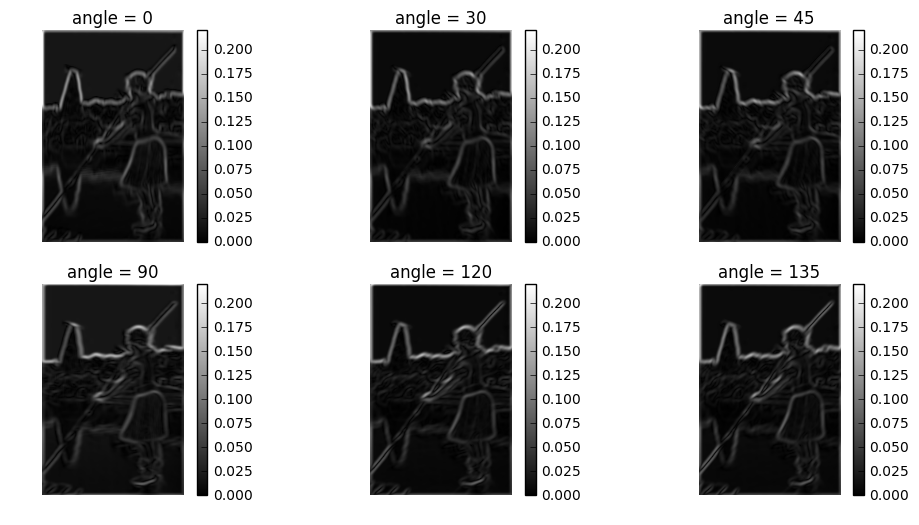

In [39]:

plt.figure(figsize=(12,6))
for i in range(6):
    # threshold = 0.015, sigma = 3, size = 20, angle = angle[i]
    mag, theta = oriented_filter(img2, 5,3, angle[i], threshold=0.015, size = 20)

    # show the magnitude in gray scale
    plt.subplot(231+i)
#     plt.imshow(mag,cmap='gray')
    plt.imshow(mag,cmap='gray',vmin=0, vmax=0.22)
    plt.axis('off')
    plt.colorbar()
    plt.title('angle = '+str(angle[i]))
plt.show()

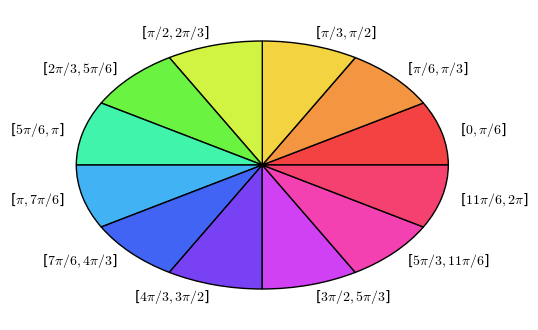

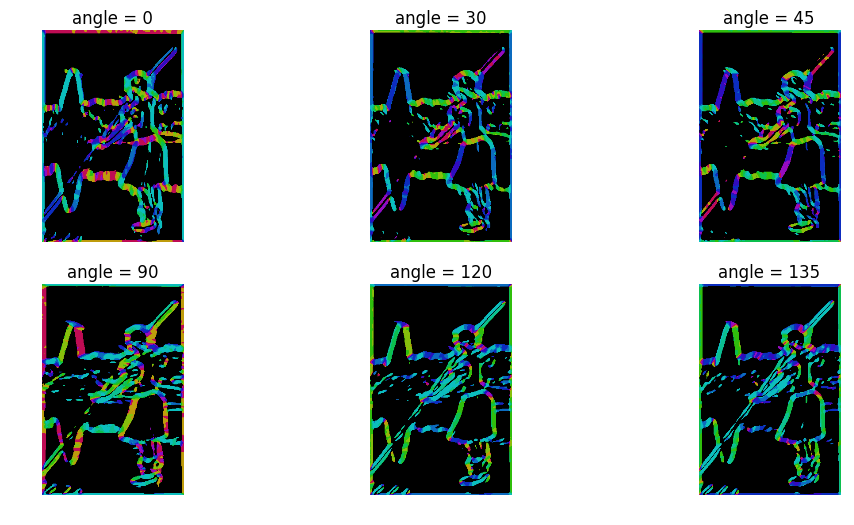

In [40]:
plot_pie()
plt.figure(figsize=(12,6))
for i in range(6):
    # threshold = 0.015, sigma = 3, size = 20, angle = angle[i]
    mag, theta = oriented_filter(img2, 5, 3,angle[i], threshold=0.015, size = 20)
    theta = get_direction(theta)
    # show the magnitude in gray scale
    plt.subplot(231+i)
    plt.imshow(theta)
    plt.axis('off')
    plt.title('angle = '+str(angle[i]))
plt.show()